In [1]:
using ValueShapes
using ArraysOfArrays
using StatsBase 
using LinearAlgebra
using Statistics
using Distributions 
using IntervalSets

using HCubature
using JLD
using CPUTime

using Plots
using Colors
using ColorSchemes
using LaTeXStrings

using SpecialFunctions

pyplot(size=(750,500))
line_colors = ColorSchemes.tab20b;

import PyPlot

plt = PyPlot

PyPlot

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 13

plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
PATH_1 = "Generated_Data/caushy_mac-3.jld" 

saved_1 = load(PATH_1)

Dict{String,Any} with 8 entries:
  "uns_ahmi_array"         => [0.0254524 0.0138126 … 0.00883198 0.00665053; 0.0…
  "integrals_true_array"   => [-0.0505554 -0.0505554 … -0.0505554 -0.0505554; -…
  "mcmc_time_array"        => [20.5692 35.8625 … 113.318 137.358; 23.9485 43.43…
  "integrals_serial_array" => [1.01304 1.01598 … 0.962942 1.04647; 0.99775 0.94…
  "integrals_ahmi_array"   => [1.00874 0.956437 … 0.978956 0.979844; 0.941737 1…
  "sample_size"            => [100000 200000 … 600000 700000; 100000 200000 … 6…
  "dim_array"              => [0 1 … 5 6; 0 1 … 5 6; … ; 0 1 … 5 6; 0 1 … 5 6]
  "uns_serial_array"       => [0.0272289 0.0181292 … 0.00760662 0.0106128; 0.02…

In [4]:
cuts_array = saved_1["dim_array"]
integrals_par = saved_1["integrals_ahmi_array"]
uns_par = saved_1["uns_ahmi_array"]
integrals_true = saved_1["integrals_true_array"]
mcmc_time_array = saved_1["mcmc_time_array"];

integrals_serial = saved_1["integrals_serial_array"];
uns_serial = saved_1["uns_serial_array"];

In [5]:
cuts_range = sort(unique(cuts_array));
integrals = integrals_par #./ exp.(integrals_true)
unsertanity_par = uns_par #./ exp.(integrals_true)
unsertanity_scatter = std(integrals, dims=1)'

mean_integrals = mean(integrals, dims=1)'
unsertanity_ahmi = mean(unsertanity_par, dims=1)';

In [6]:
integrals_s = integrals_serial #./ exp.(integrals_true)
unsertanity_scatter_s = std(integrals_s, dims=1)'

mean_integrals_s = mean(integrals_s, dims=1)'
unsertanity_s = mean(uns_serial, dims=1)';

In [7]:
sz = size(integrals)
xx = []
yy = []
zz = []

for i in 1:sz[2]
    append!(yy, integrals[:,i])
    append!(zz, integrals_s[:,i])
    append!(xx, repeat([cuts_range[i]], sz[1]))
end

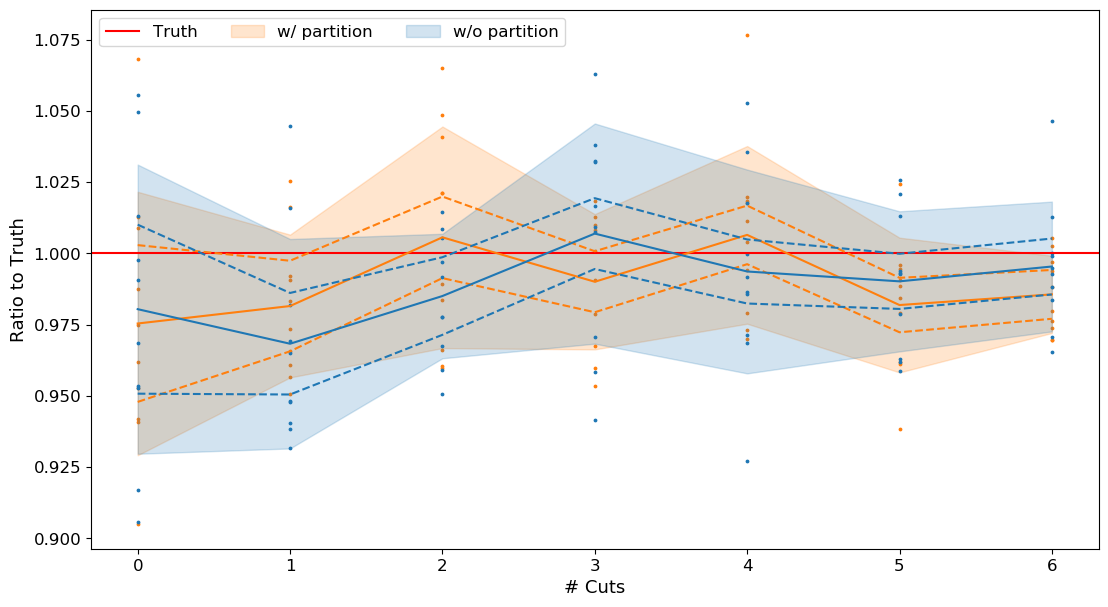

PyObject <matplotlib.legend.Legend object at 0x15d0905d0>

In [8]:
fig, ax = plt.subplots(figsize=(13, 7), sharex=true)

ax.axhline(1, c="red", label="Truth")
ax.plot(cuts_range, mean_integrals, color="C1")
ax.fill_between(cuts_range, mean_integrals[:,1] .- unsertanity_scatter[:,1], mean_integrals[:,1] .+ unsertanity_scatter[:,1], alpha=0.2, color="C1", label="w/ partition")
ax.plot(cuts_range, mean_integrals[:,1] .- unsertanity_ahmi[:,1], alpha=1, ls="--", color="C1",  )
ax.plot(cuts_range, mean_integrals[:,1] .+ unsertanity_ahmi[:,1], alpha=1, ls="--", color="C1")
ax.scatter(xx, yy, color="C1", s=3)

ax.plot(cuts_range, mean_integrals_s, color="C0")
ax.fill_between(cuts_range, mean_integrals_s[:,1] .- unsertanity_scatter_s[:,1], mean_integrals_s[:,1] .+ unsertanity_scatter_s[:,1], alpha=0.2, color="C0", label="w/o partition")
ax.plot(cuts_range, mean_integrals_s[:,1] .- unsertanity_s[:,1], alpha=1, ls="--", color="C0",  )
ax.plot(cuts_range, mean_integrals_s[:,1] .+ unsertanity_s[:,1], alpha=1, ls="--", color="C0")
ax.scatter(xx, zz, color="C0", s=3)

ax.set_xlabel("# Cuts")
ax.set_ylabel("Ratio to Truth")
ax.legend(loc="upper left", frameon=true, framealpha=0.8, ncol=5)

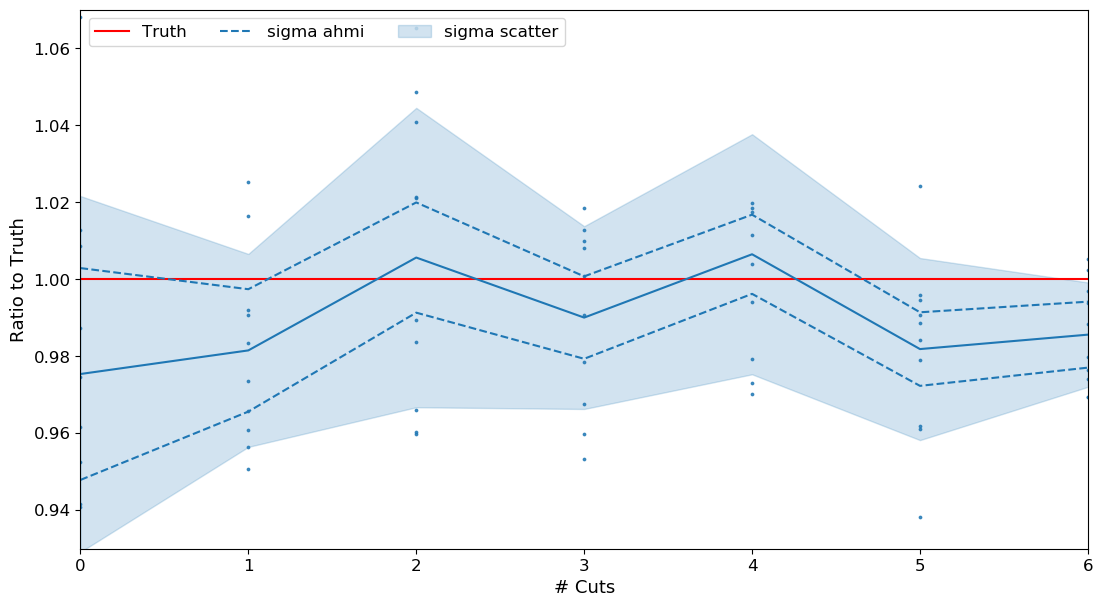

(0.93, 1.07)

In [9]:
fig, ax = plt.subplots(figsize=(13, 7), sharex=true)

ax.axhline(1, c="red", label="Truth")
ax.plot(cuts_range, mean_integrals, color="C0")
ax.fill_between(cuts_range, mean_integrals[:,1] .- unsertanity_scatter[:,1], mean_integrals[:,1] .+ unsertanity_scatter[:,1], alpha=0.2, color="C0", label="sigma scatter")
ax.plot(cuts_range, mean_integrals[:,1] .- unsertanity_ahmi[:,1], alpha=1, ls="--", color="C0",  label="sigma ahmi")
ax.plot(cuts_range, mean_integrals[:,1] .+ unsertanity_ahmi[:,1], alpha=1, ls="--", color="C0")
ax.scatter(xx, yy, color="C0", s=3, alpha=0.8)

ax.set_xlabel("# Cuts")
ax.set_ylabel("Ratio to Truth")
ax.legend(loc="upper left", frameon=true, framealpha=0.8, ncol=5)

ax.set_xlim(0,6)
ax.set_ylim(0.93,1.07)

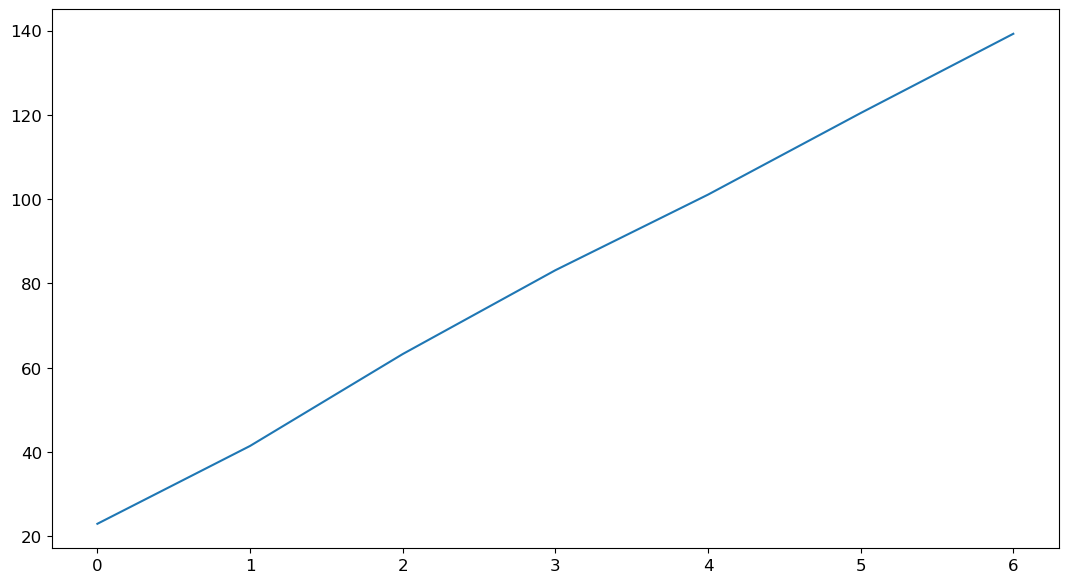

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x162ad51d0>

In [10]:
mean_time = mean(mcmc_time_array, dims=1)'

fig, ax = plt.subplots(figsize=(13, 7), sharex=true)

ax.plot(cuts_range, mean_time)

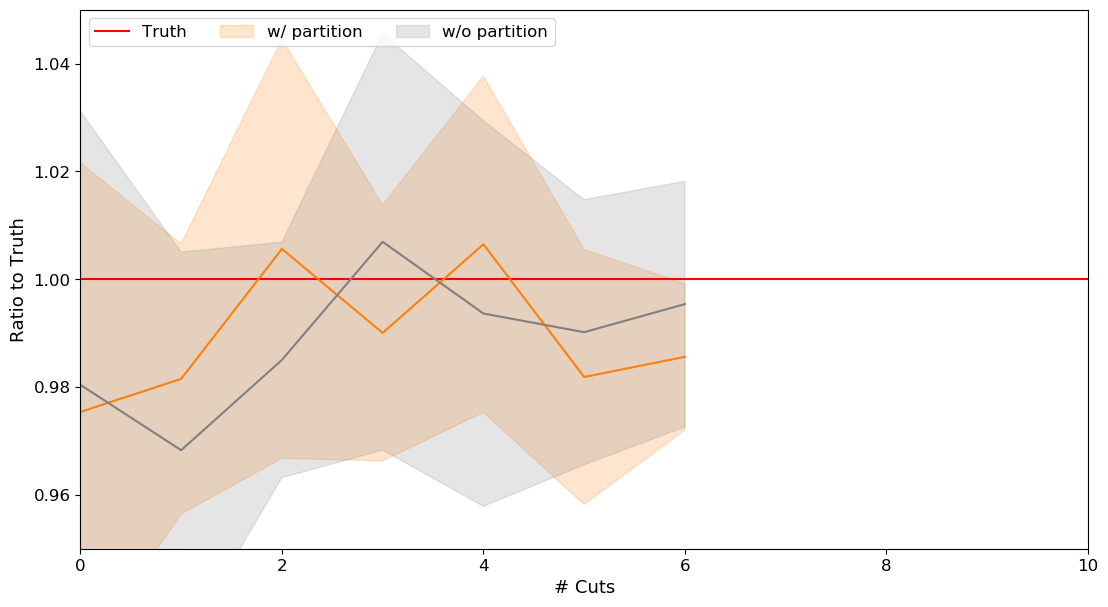

(0.95, 1.05)

In [11]:
fig, ax = plt.subplots(figsize=(13, 7), sharex=true)

ax.axhline(1, c="red", label="Truth")
ax.plot(cuts_range, mean_integrals, color="C1")
ax.fill_between(cuts_range, mean_integrals[:,1] .- unsertanity_scatter[:,1], mean_integrals[:,1] .+ unsertanity_scatter[:,1], alpha=0.2, color="C1", label="w/ partition")

ax.plot(cuts_range, mean_integrals_s, color="gray")
ax.fill_between(cuts_range, mean_integrals_s[:,1] .- unsertanity_scatter_s[:,1], mean_integrals_s[:,1] .+ unsertanity_scatter_s[:,1], alpha=0.2, color="gray", label="w/o partition")

ax.set_xlabel("# Cuts")
ax.set_ylabel("Ratio to Truth")
ax.legend(loc="upper left", frameon=true, framealpha=0.8, ncol=5)

ax.set_xlim(0,10)
ax.set_ylim(0.95,1.05)

# Comparison for different acceptance:

In [ ]:
tmp_1 = load("Generated_Data/normal_2-mcmc.jld")["integrals_ahmi_array"]
tmp_2 = load("Generated_Data/normal_1-mcmc.jld")["integrals_ahmi_array"]
tmp_3 = load("Generated_Data/normal_3-mcmc.jld")["integrals_ahmi_array"];

In [ ]:
mean_1 = mean(tmp_1, dims=1)'
unsertanity_1 = std(tmp_1, dims=1)';

mean_2 = mean(tmp_2, dims=1)'
unsertanity_2 = std(tmp_2, dims=1)';

mean_3 = mean(tmp_3, dims=1)'
unsertanity_3 = std(tmp_3, dims=1)';

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7), sharex=true)

ax.axhline(1, c="red", label="Truth")

ax.plot(0:10, mean_1[1:11], color=PyPlot.ColorMap("tab20c").colors[1], label=L"\alpha=0.55:0.65")
ax.fill_between(0:10, mean_1[1:11] .- unsertanity_1[1:11], mean_1[1:11] .+ unsertanity_1[1:11], alpha=0.2, color=PyPlot.ColorMap("tab20c").colors[4])

ax.plot(0:10, mean_2[1:11], color=PyPlot.ColorMap("tab20c").colors[9], label=L"\alpha=0.15:0.35")
# ax.fill_between(0:10, mean_2[1:11] .- unsertanity_2[1:11], mean_2[1:11] .+ unsertanity_2[1:11], alpha=0.2, color=PyPlot.ColorMap("tab20c").colors[9],)

ax.plot(0:10, mean_3[1:11], color=PyPlot.ColorMap("tab20c").colors[5], label=L"\alpha=0.05:0.1")
ax.fill_between(0:10, mean_3[1:11] .- unsertanity_3[1:11], mean_3[1:11] .+ unsertanity_3[1:11], alpha=0.2, color=PyPlot.ColorMap("tab20c").colors[7])


ax.set_xlabel("# Cuts")
ax.set_ylabel("Ratio to Truth")
ax.legend(loc="upper left", frameon=true, framealpha=0.8, ncol=5)

ax.set_xlim(0,10)
ax.set_ylim(0.93,1.07)